# 1. Crie um jupyter notebook com os imports necessários e um código para gerar os gráficos referentes a base de dados de março, abril, maio, junho e dezembro (numa célula só ou em várias).

Digite o mês que gostaria de selecionar de visualizar os gráficos:  dezembro


   IDADEMAE       SEXO  APGAR1  APGAR5  PESO  CONSULTAS      DTNASC  \
0        19  Masculino     9.0    10.0  3685          4  2019-02-19   
1        29   Feminino     8.0     9.0  3055          4  2019-02-21   
2        37   Feminino     8.0    10.0  3460          4  2019-02-25   
3        30   Feminino     9.0    10.0  2982          3  2019-03-20   
4        30   Feminino     8.0    10.0  3310          4  2019-03-23   

          GESTACAO GRAVIDEZ           ESCMAE  IDADEPAI  
0  37 a 41 semanas    Única      8 a 11 anos      26.0  
1  37 a 41 semanas    Única      8 a 11 anos      24.0  
2  37 a 41 semanas    Única      8 a 11 anos      32.0  
3  37 a 41 semanas    Única  12 anos ou mais      24.0  
4  37 a 41 semanas    Única      8 a 11 anos      27.0  


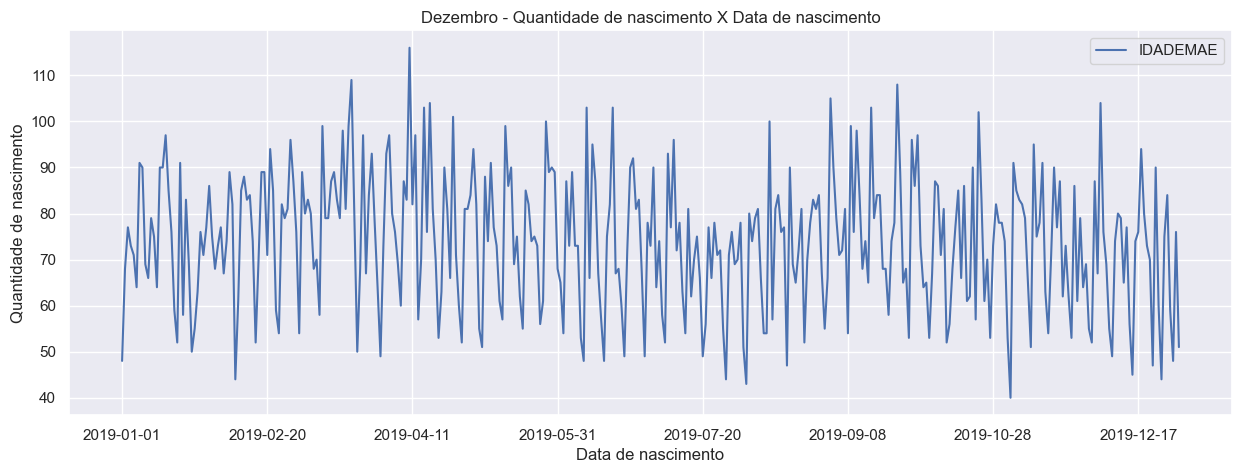

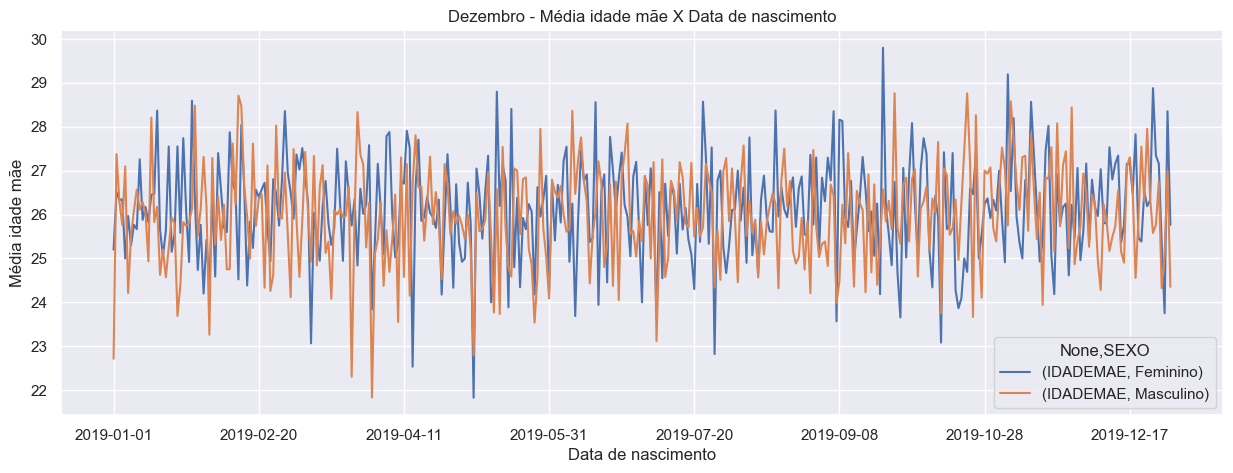

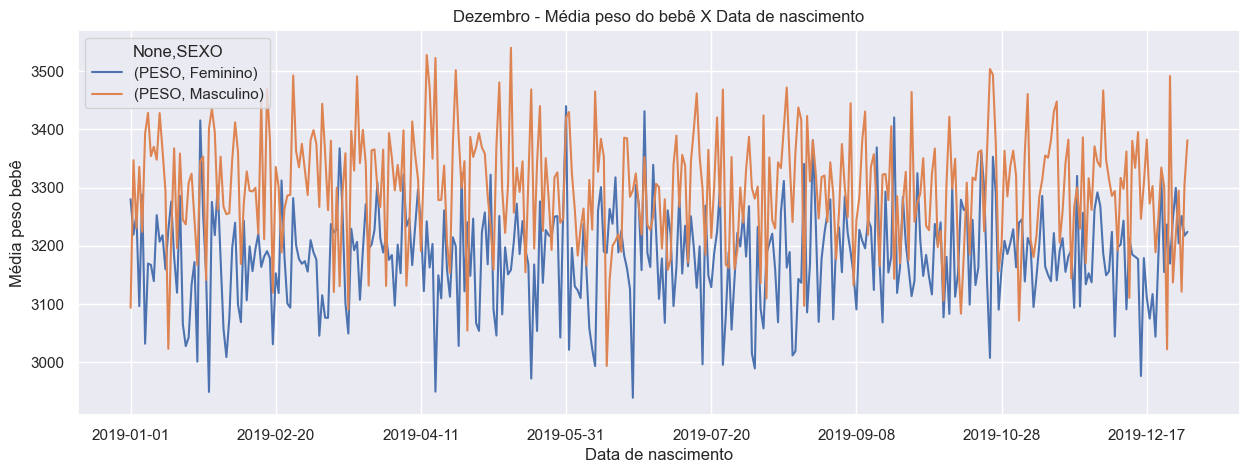

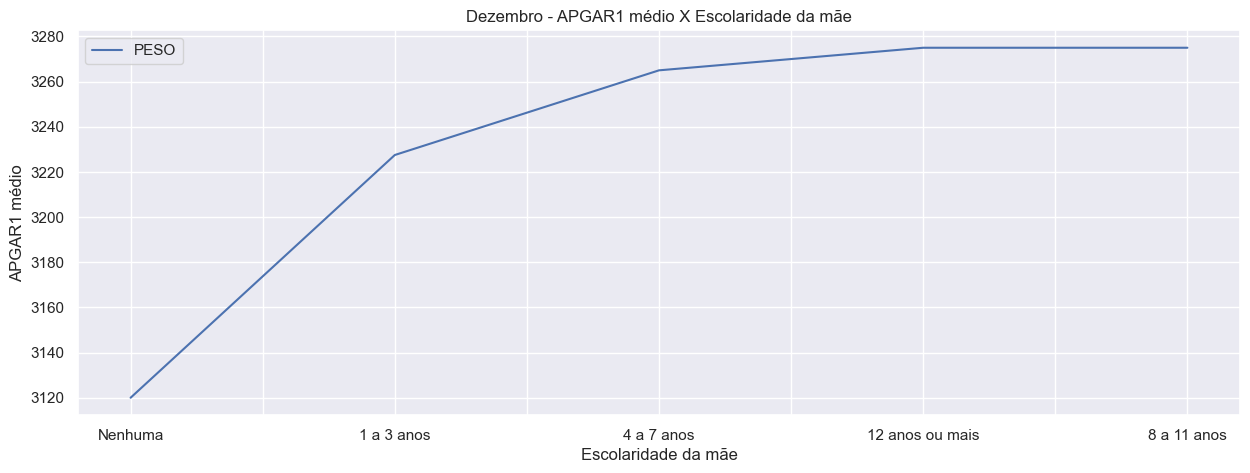

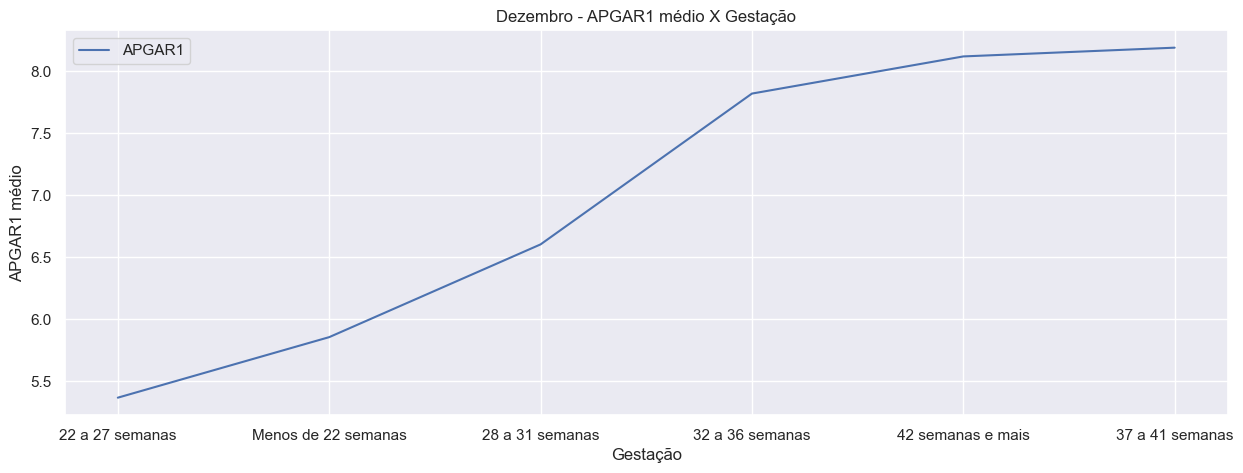

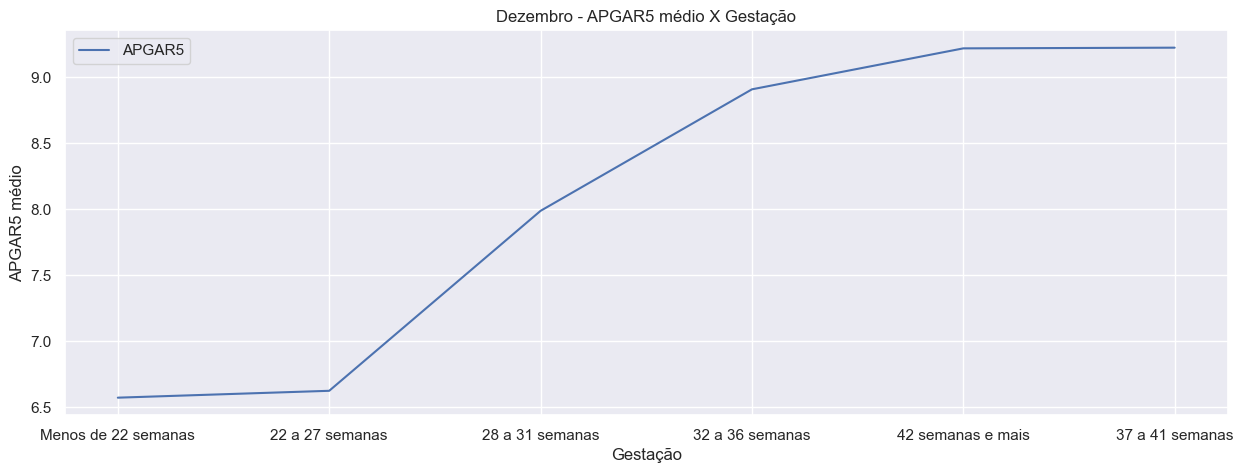

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

sns.set_theme()

def plota_pivot_table(df, value, index, func, ylabel, xlabel, title, opcao='nada'):
    if opcao == 'nada':
        pd.pivot_table(df, values=value, index=index,
                       aggfunc=func).plot(figsize=[15, 5])
    elif opcao == 'sort':
        pd.pivot_table(df, values=value, index=index,
                       aggfunc=func).sort_values(value).plot(figsize=[15, 5])
    elif opcao == 'unstack':
        pd.pivot_table(df, values=value, index=index,
                       aggfunc=func).unstack().plot(figsize=[15, 5])
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    return None

mes = {'JANEIRO': './input/SINASC_RO_2019_JAN.csv',
      'FEVEREIRO' : './input/SINASC_RO_2019_FEV.csv',
      'MARÇO' : './input/SINASC_RO_2019_MAR.csv',
      'ABRIL' : './input/SINASC_RO_2019_ABR.csv',
      'MAIO' : './input/SINASC_RO_2019_MAI.csv',
       'JUNHO' : './input/SINASC_RO_2019_JUN.csv',
       'JULHO' : './input/SINASC_RO_2019_JUL.csv',
      'AGOSTO' : './input/SINASC_RO_2019_AGO.csv',
       'SETEMBRO' : './input/SINASC_RO_2019_SET.csv',
       'OUTUBRO' : './input/SINASC_RO_2019_OUT.csv',
       'NOVEMBRO' : './input/SINASC_RO_2019_NOV.csv',
       'DEZEMBRO' : './input/SINASC_RO_2019_DEZ.csv'
      }

pergunta = input('Digite o mês que gostaria de selecionar de visualizar os gráficos: ').upper()

if pergunta in mes:
    sinasc = pd.read_csv(mes[pergunta])
    print(sinasc.head())
else:
    print('Mês não encontrado.')
    
pergunta = pergunta.capitalize()

max_data = sinasc.DTNASC.max()[:7]
os.makedirs('./output/figs/'+max_data, exist_ok=True)

plota_pivot_table(sinasc, 'IDADEMAE', 'DTNASC', 'count', 'Quantidade de nascimento','Data de nascimento', 
                  pergunta + ' - Quantidade de nascimento X Data de nascimento')
plt.savefig('./output/figs/'+max_data+'/'+pergunta+' - Quantidade de nascimento X Data de nascimento.png')


plota_pivot_table(sinasc, 'IDADEMAE', ['DTNASC', 'SEXO'], 'mean', 'Média idade mãe','Data de nascimento',
                  pergunta + ' - Média idade mãe X Data de nascimento','unstack')
plt.savefig('./output/figs/'+max_data+'/'+pergunta+' - Média idade mãe X Data de nascimento.png')


plota_pivot_table(sinasc, 'PESO', ['DTNASC', 'SEXO'], 'mean', 'Média peso bebê','Data de nascimento',
                  pergunta + ' - Média peso do bebê X Data de nascimento', 'unstack')
plt.savefig('./output/figs/'+max_data+'/'+pergunta+' - Média peso bebê X Data de nascimento.png')


plota_pivot_table(sinasc, 'PESO', 'ESCMAE', 'median', 'APGAR1 médio','Escolaridade da mãe',
                  pergunta + ' - APGAR1 médio X Escolaridade da mãe','sort')
plt.savefig('./output/figs/'+max_data+'/'+pergunta+' - APGAR1 médio X Escolaridade da mãe.png')


plota_pivot_table(sinasc, 'APGAR1', 'GESTACAO', 'mean', 'APGAR1 médio','Gestação',
                  pergunta + ' - APGAR1 médio X Gestação', 'sort')
plt.savefig('./output/figs/'+max_data+'/'+pergunta+' - APGAR1 médio X Gestação.png')


plota_pivot_table(sinasc, 'APGAR5', 'GESTACAO', 'mean', 'APGAR5 médio','Gestação',
                  pergunta + ' - APGAR5 médio X Gestação', 'sort')
plt.savefig('./output/figs/'+max_data+'/'+pergunta+' - APGAR5 médio X Gestação.png')

# 2. Como que você poderia fazer para deixar isso mais automatizado? Descreva na última célula do jupyter notebook o que ajudaria na hora de gerar novos gráficos pros meses/anos seguintes.

Criei uma linha de código de entrada, onde o usuário pode digitar o mês que gostaria de acessar nos gráficos sem a necessidade de modificar o código.